<h1>Testing Data Processing with AVAX and BTC</h1>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [25]:
# Adds log returns for current time, as well as log returns for 5 rows before
def data_processing(df):
    curr = df.price
    back1 = df.price.shift(1)
    back2 = df.price.shift(2)
    back3 = df.price.shift(3)
    back4 = df.price.shift(4)
    back5 = df.price.shift(5)
    back6 = df.price.shift(6)
    df["log_returns"] = np.log(curr / back1)
    df["log_returns_back1"] = np.log(back1 / back2)
    df["log_returns_back2"] = np.log(back2 / back3)
    df["log_returns_back3"] = np.log(back3 / back4)
    df["log_returns_back4"] = np.log(back4 / back5)
    df["log_returns_back5"] = np.log(back5 / back6)

    return df.dropna()

<h2>Importing Binance data for BTC (1/29/2024 ~ 1/30/2024)</h2>

In [14]:
train_path_btc = "/pool/btcavax/binance-usdtfutures/trades/btc/2024-01-29.csv"
test_path_btc = "/pool/btcavax/binance-usdtfutures/trades/btc/2024-01-30.csv"

train_btc = pd.read_csv(train_path_btc, sep="|")
test_btc = pd.read_csv(test_path_btc, sep="|")

In [15]:
print(train_btc.shape)
train_btc.head()

(3264398, 5)


,symbol,side,time,price,volume
0,BTCUSDT,0,1706486400134000,42021.2,924.4664
1,BTCUSDT,1,1706486400169000,42021.3,336.1704
2,BTCUSDT,0,1706486400192000,42021.2,420.2120
3,BTCUSDT,1,1706486400229000,42021.3,4160.1087
4,BTCUSDT,1,1706486400235000,42021.3,126.0639


In [16]:
print(test_btc.shape)
test_btc.head()

(3270538, 5)


,symbol,side,time,price,volume
0,BTCUSDT,0,1706572800023000,43287.6,1038.9024
1,BTCUSDT,0,1706572800023000,43287.6,129.8628
2,BTCUSDT,0,1706572800023000,43287.6,692.6016
3,BTCUSDT,0,1706572800023000,43287.6,303.0132
4,BTCUSDT,0,1706572800023000,43287.6,1731.5040


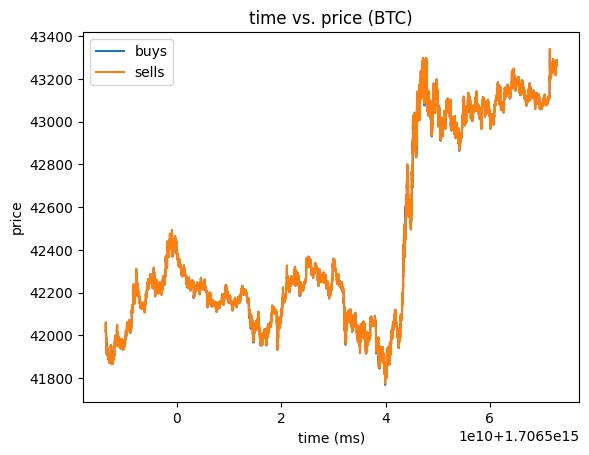

In [35]:
buys = train_btc.loc[train_btc["side"] == 0]
x1 = buys["time"]
y1 = buys["price"]

sells = train_btc.loc[train_btc["side"] == 1]
x2 = sells["time"]
y2 = sells["price"]

plt.plot(x1, y1, label="buys")
plt.plot(x2, y2, label="sells")

plt.legend()

plt.xlabel("time (ms)")
plt.ylabel("price")
plt.title("time vs. price (BTC)")

plt.show()

<h2>Importing Binance data for AVAX (1/29/2024 ~ 1/30/2024)</h2>

In [28]:
train_path_avax = "/pool/btcavax/binance-usdtfutures/trades/avax/2024-01-29.csv"
test_path_avax = "/pool/btcavax/binance-usdtfutures/trades/avax/2024-01-30.csv"

train_avax = pd.read_csv(train_path_avax, sep="|")
test_avax = pd.read_csv(test_path_avax, sep="|")

In [29]:
print(train_avax.shape)
train_avax.head()

(1058271, 5)


,symbol,side,time,price,volume
0,AVAXUSDT,1,1706486400012000,34.815,34.815
1,AVAXUSDT,1,1706486400013000,34.815,104.445
2,AVAXUSDT,0,1706486400146000,34.813,208.878
3,AVAXUSDT,0,1706486400247000,34.811,104.433
4,AVAXUSDT,0,1706486400247000,34.810,139.240


In [30]:
print(test_avax.shape)
test_avax.head()

(943907, 5)


,symbol,side,time,price,volume
0,AVAXUSDT,0,1706572802812000,36.041,216.246
1,AVAXUSDT,0,1706572802812000,36.041,36.041
2,AVAXUSDT,0,1706572802814000,36.041,252.287
3,AVAXUSDT,1,1706572802864000,36.042,180.210
4,AVAXUSDT,1,1706572802890000,36.042,252.294


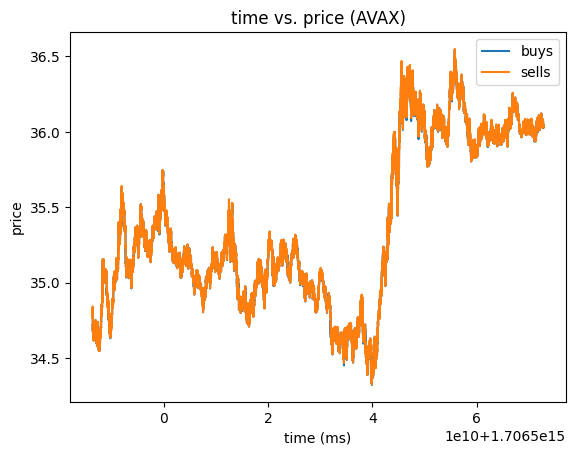

In [32]:
buys = train_avax.loc[train_avax["side"] == 0]
x1 = buys["time"]
y1 = buys["price"]

sells = train_avax.loc[train_avax["side"] == 1]
x2 = sells["time"]
y2 = sells["price"]

plt.plot(x1, y1, label="buys")
plt.plot(x2, y2, label="sells")

plt.legend()

plt.xlabel("time (ms)")
plt.ylabel("price")
plt.title("time vs. price (AVAX)")

plt.show()